# Melbourne Housing Market Prediction Model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
df = pd.read_csv('mel.csv')

# Info Visualization and Analysis

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [32]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


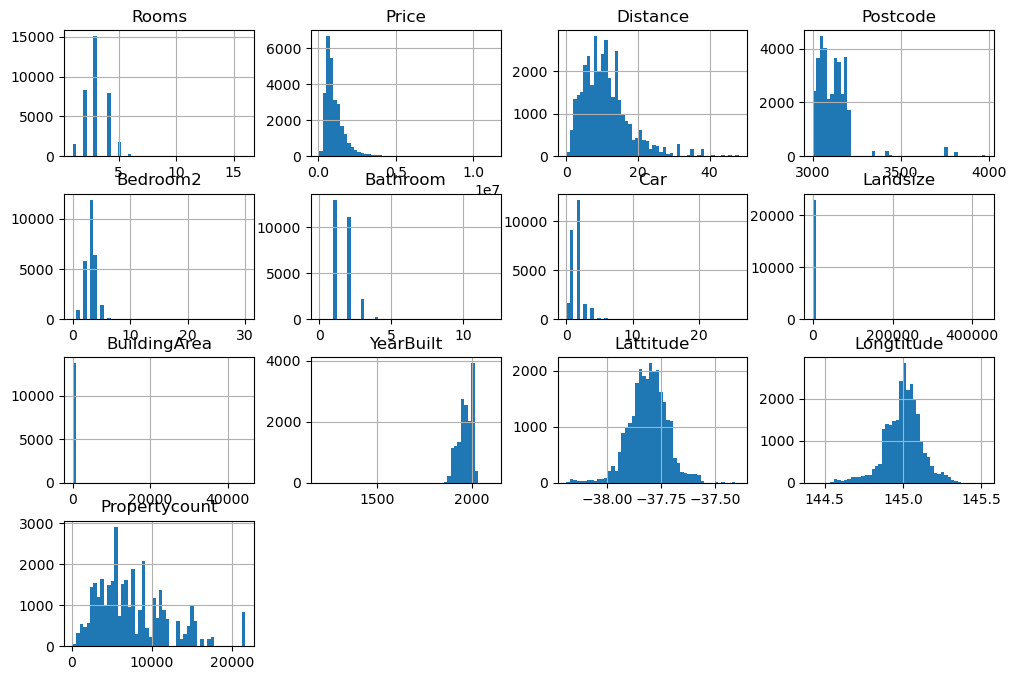

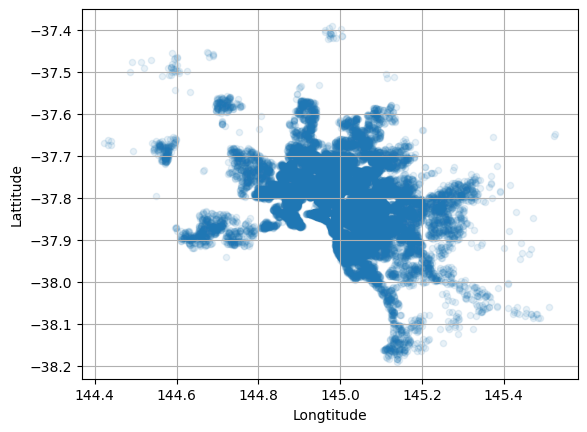

In [33]:
df.hist(bins=50, figsize=(12, 8))
df.plot( kind="scatter", x="Longtitude", y="Lattitude", grid=True, alpha=0.1)
plt.show()

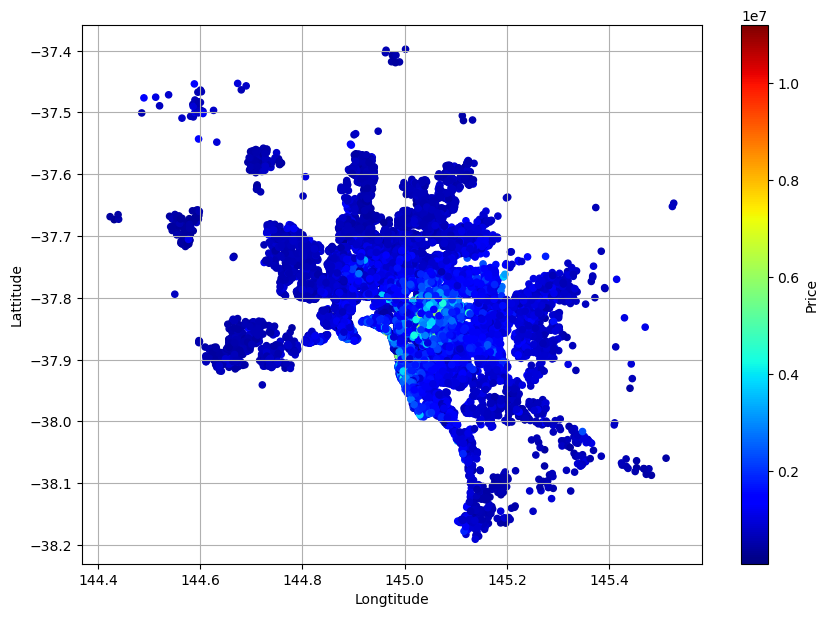

In [34]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", grid=True,
    c="Price", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [57]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64

In [58]:
df["Rooms"].nunique()

12

# Creating Test Sets

In [4]:
# Creating income category to correctly stratify test sets
df["Rooms_cat"] = pd.cut(df["Rooms"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

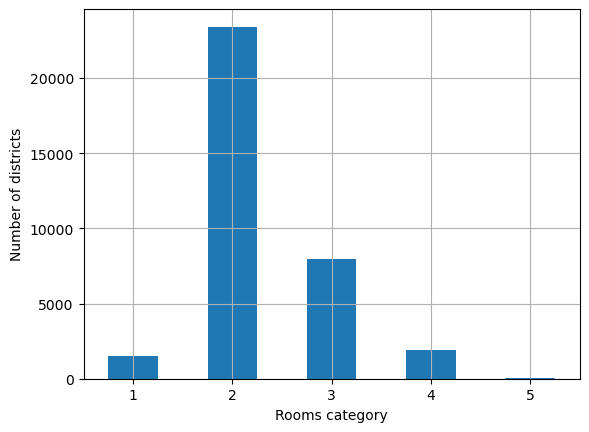

In [5]:
df["Rooms_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Rooms category")
plt.ylabel("Number of districts")
plt.show()

In [53]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df, df["Rooms_cat"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [54]:
strat_train_set, strat_test_set = strat_splits[0]
strat_test_set["Rooms_cat"].value_counts() / len(strat_test_set)

Rooms_cat
2    0.671830
3    0.228199
4    0.055651
1    0.042456
5    0.001865
Name: count, dtype: float64

In [59]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Rooms_cat", axis=1, inplace=True)

/var/folders/3v/q192mwhs5095dds9n1kjhyb80000gn/T/ipykernel_10166/525518431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("Rooms_cat", axis=1, inplace=True)
/var/folders/3v/q192mwhs5095dds9n1kjhyb80000gn/T/ipykernel_10166/525518431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("Rooms_cat", axis=1, inplace=True)


# Data Cleaning

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26881 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Rooms                                  26881 non-null  int64         
 1   Price                                  20993 non-null  float64       
 2   Date                                   26881 non-null  datetime64[ns]
 3   Postcode                               26881 non-null  float64       
 4   Bedroom2                               26614 non-null  float64       
 5   Bathroom                               26605 non-null  float64       
 6   Car                                    26103 non-null  float64       
 7   Landsize                               23021 non-null  float64       
 8   CouncilArea                            26881 non-null  object        
 9   Lattitude                              26881 non-null  float64    

,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,...,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,NaN,2016-09-03,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,...,False,False,False,False,True,False,False,False,False,False
1,2,1480000.0,2016-12-03,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,...,False,False,False,False,True,False,False,False,False,False
2,2,1035000.0,2016-02-04,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,...,False,False,False,False,True,False,False,False,False,False
3,3,NaN,2016-02-04,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,...,False,True,False,False,True,False,False,False,False,False
4,3,1465000.0,2017-03-04,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,...,False,False,False,False,True,False,False,False,False,False


In [16]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64

In [29]:
df = df.dropna(subset=['Lattitude', 'Longtitude'])

In [30]:
# Removing because too many values or not enough data
df.drop("YearBuilt", axis=1, inplace=True)
df.drop("Method", axis=1, inplace=True)
df.drop("Address", axis=1, inplace=True)
df.drop("Distance", axis=1, inplace=True)
df.drop("BuildingArea", axis=1, inplace=True)
df.drop("Propertycount", axis=1, inplace=True)
df.drop("SellerG", axis=1, inplace=True)
df.drop("Suburb", axis=1, inplace=True) # 345 different options
df.drop("CouncilArea", axis=1, inplace=True) # 33 different -> could yse Label Encoder but could be arbitrary and non meaningful

In [ ]:
# Converting to DateTime value from string
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
# One hot encoding 
df = pd.get_dummies(df, columns=['Type']) # added 3 bools
df = pd.get_dummies(df, columns=['Regionname']) # added 8 bools 

### Imputation

### Scaling